# draft

## import

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define some funtions

In [2]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
soft = torch.nn.Softmax(dim=1)

## Exam4: AbAcAd (3)

### data

In [49]:
txt = list('A12a12')*100
txt[:5]

['A', '1', '2', 'a', '1']

In [50]:
n_words = len(list(pd.Series(txt).unique()))

In [51]:
dct = dict(pd.Series(txt[:n_words]))
mapping = dict(zip(dct.values(),dct.keys()))
mapping

{'A': 0, '1': 1, '2': 2, 'a': 3}

In [52]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [53]:
txt_x[:4],txt_y[:3]

(['A', '1', '2', 'a'], ['1', '2', 'a'])

In [54]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [55]:
x,y

(tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.]]),
 tensor([[0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         ...,
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]))

### rnn

In [56]:
net1 = torch.nn.RNN(n_words,5)
net2 = torch.nn.Linear(5,n_words) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(net1.parameters())+list(net2.parameters()))

In [57]:
for epoc in range(3000):
    ## step1 
    hidden, hT = net1(x,torch.zeros(1,5))
    output = net2(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [58]:
yhat=soft(output)

In [59]:
combind = torch.concat([hidden,yhat],axis=1)

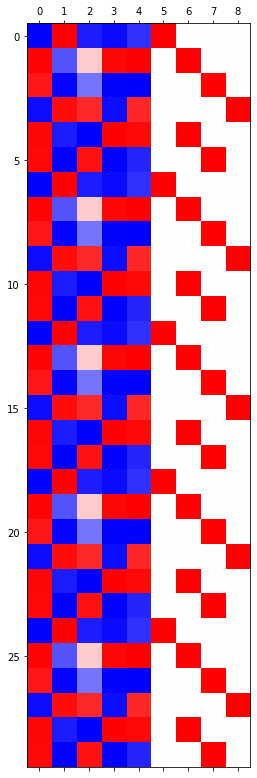

In [60]:
plt.matshow(combind.data[-30:],cmap='bwr')

### LSTM

`-` LSTM

In [61]:
net1 = torch.nn.LSTM(n_words,5)
net2 = torch.nn.Linear(5,n_words) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(net1.parameters())+list(net2.parameters()))

In [62]:
x

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]])

In [63]:
for epoc in range(3000):
    ## step1 
    hidden, _ = net1(x,(torch.zeros(1,5),torch.zeros(1,5)))
    output = net2(hidden)
    ## step2 
    loss = loss_fn(output,y)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

In [64]:
yhat=soft(output)

In [65]:
combind = torch.concat([hidden,yhat],axis=1)

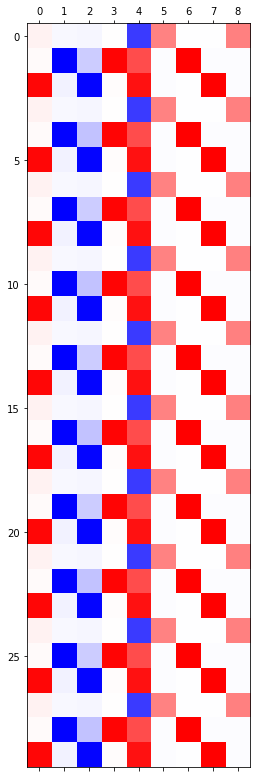

In [66]:
plt.matshow(combind.data[-30:],cmap='bwr')